# Bank Marketing Dataset

## Goal
Given the attributes of the bank client, predict whether the client will subscribe to the term deposit or not. This is a binary classification problem that only predicts ‘yes’ or ‘no’.

### Step1: Business Understanding
This data was extracted from the UCI Machine Learning Repository found at: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls to contact client to check if the bank term deposit would be subscribed.Sometimes, more than one contact to the same client was required, in order to access if the product would be ('yes') or not ('no') subscribed.



### Step 2: Data understanding
Attribute Information:

Input variables:
**bank client data:**
1 - age (numeric)

2 - job : type of job (categorical)
-admin
-blue collar
-entrepreneur
-housemaid
-management
-retired
-self-employed
-services
-student
-technician
-unemployed
-unknown

3 - marital : marital status (categorical)
-divorced (means divorced or widowed)
-married
-single
-unknown


4 - education (categorical) 
-basic.4y
-basic.6y
-basic.9y
-high.school
-illiterate
-professional.course
-university.degree
-unknown

5 - default: has credit in default? (categorical:
-no
-yes
-unknown

6 - housing: has housing loan? (categorical)
-no
-yes
-unknown

7 - loan: has personal loan? (categorical)
-no
-yes
-unknown

**related with the last contact of the current campaign:**
8 - contact: contact communication type (categorical)
-cellular
-telephone

9 - month: last contact month of year (categorical)
-jan
-feb
-mar
.
.
.
-dec

10 - day_of_week: last contact day of the week (categorical)
-mon
-tue
-wed
-thu
-fri

11 - duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical)
-failure
-nonexistent
-success

**social and economic context attributes**
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary)
yes
no

___
## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from IPython.display import display

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline


df= pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep=';',quotechar='"', engine='python' )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [2]:
#This data have missing value, but when we print out it didn't display any null value.
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
display(df.head(5))
display(df.describe())
display(df.shape)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


(41188, 21)

In [5]:
print('check if data balanced')
print(df.y.value_counts())


check if data balanced
no     36548
yes     4640
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

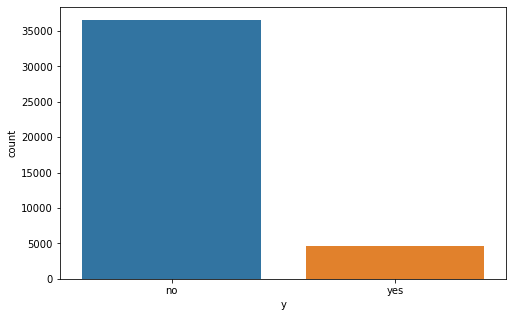

In [6]:
plt.figure(figsize=(8,5))


#count rows of each classes
sns.countplot(x='y', data=df)

The dataset is imbalanced where the "no" is 8 times higher than "yes"

In [7]:
# create a function to show unique categorical values in data frame
def get_unique_list(data):
    for i in data.columns:
        if data[i].dtypes=='object':
            print(i)
            print(data[i].unique())
            print(data[i].value_counts()/data.shape[0]*100)

In [8]:
get_unique_list(df)

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64
marital
['married' 'single' 'divorced' 'unknown']
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unkno

 79% of customer default in this dataset is labeled as unknown. Further study of the unknown data is needed.
 Thus, in order to understand whether this variable will impact on target variable we done a chi square test as below.

In [9]:
#convert y into integer
df['y'] = df['y'].replace(to_replace = ['yes','no'],value = ['1','0'])
df['y'] = pd.to_numeric(df['y'], downcast="integer")

[]

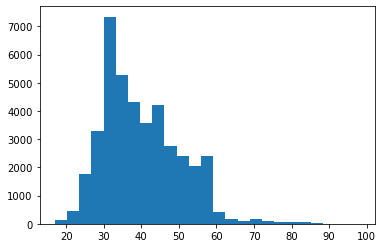

In [10]:
plt.hist(df['age'],bins=25)
plt.plot()

observed data 'age'<20 

In [11]:
get_unique_list(df[df['age']<20])

job
['student']
student    100.0
Name: job, dtype: float64
marital
['single']
single    100.0
Name: marital, dtype: float64
education
['basic.9y' 'high.school' 'basic.6y' 'unknown' 'basic.4y']
unknown        42.666667
basic.9y       28.000000
high.school    12.000000
basic.4y        9.333333
basic.6y        8.000000
Name: education, dtype: float64
default
['unknown' 'no']
no         96.0
unknown     4.0
Name: default, dtype: float64
housing
['yes' 'no' 'unknown']
yes        66.666667
no         28.000000
unknown     5.333333
Name: housing, dtype: float64
loan
['no' 'yes' 'unknown']
no         78.666667
yes        16.000000
unknown     5.333333
Name: loan, dtype: float64
contact
['cellular' 'telephone']
cellular     86.666667
telephone    13.333333
Name: contact, dtype: float64
month
['jul' 'nov' 'mar' 'apr' 'may' 'aug' 'sep' 'oct' 'dec' 'jun']
apr    25.333333
aug    18.666667
may    16.000000
sep    12.000000
nov     9.333333
mar     5.333333
dec     5.333333
jul     4.000000
oct     

<AxesSubplot:xlabel='housing', ylabel='count'>

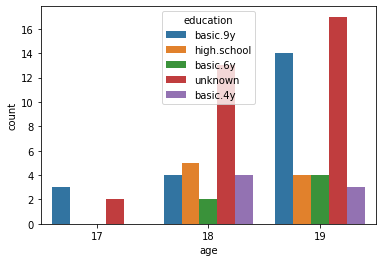

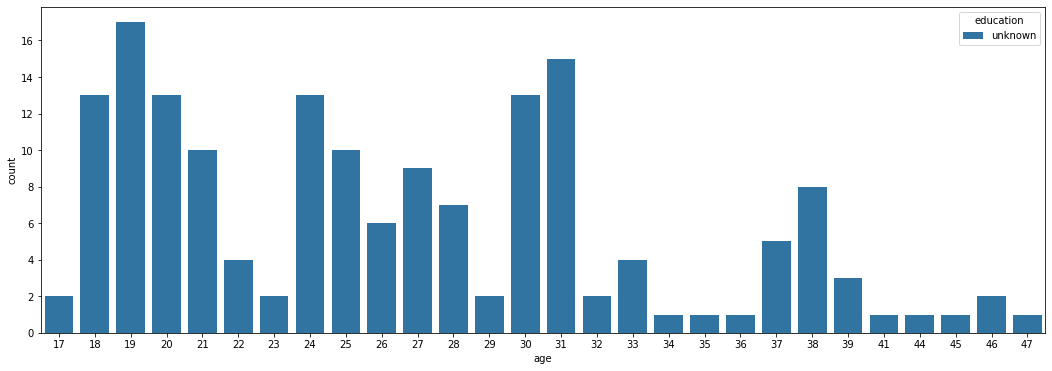

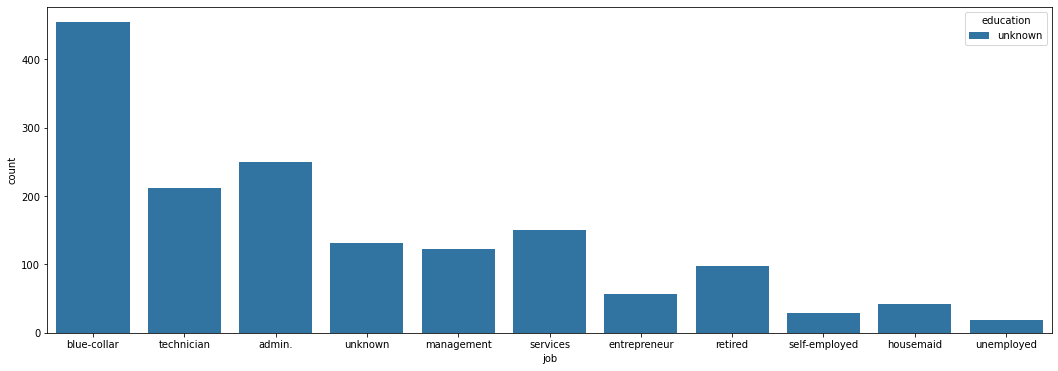

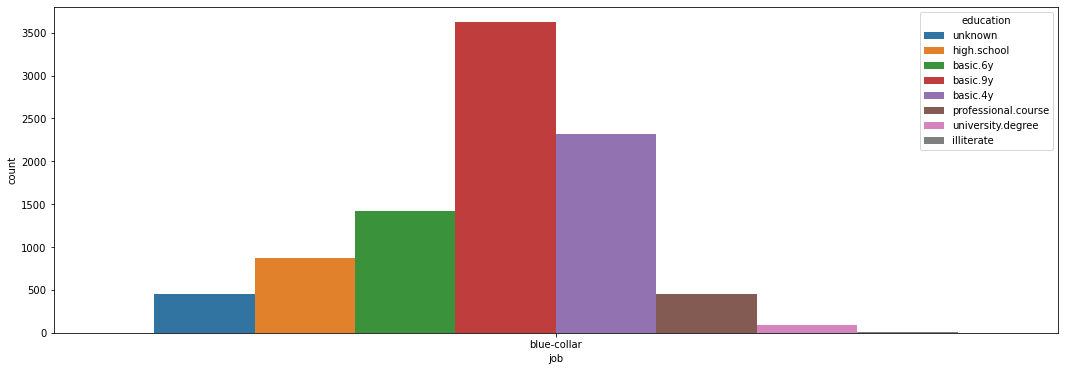

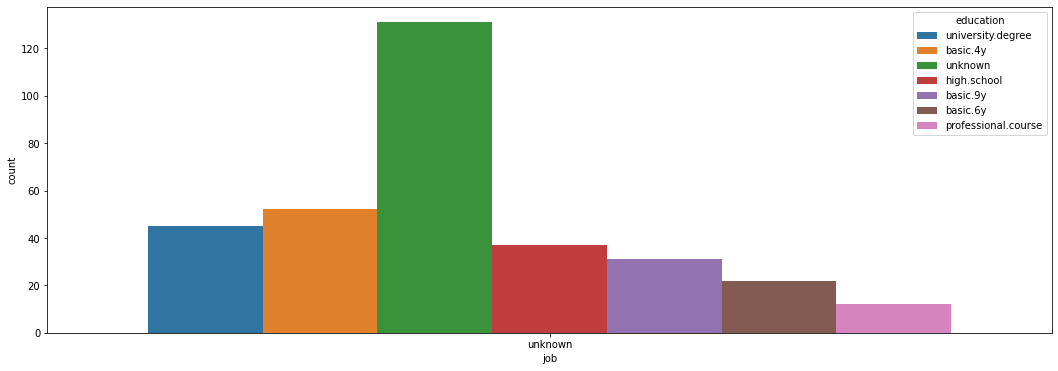

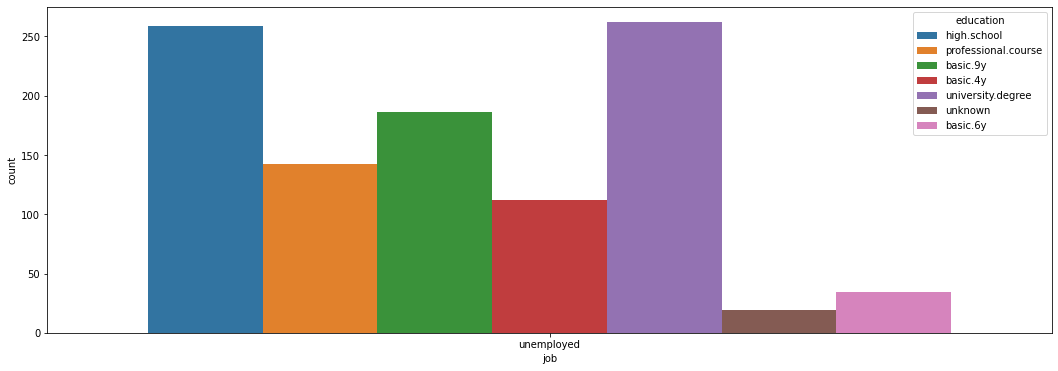

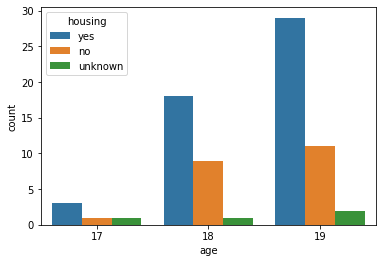

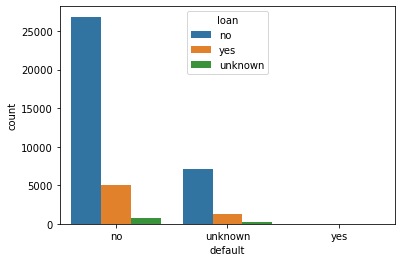

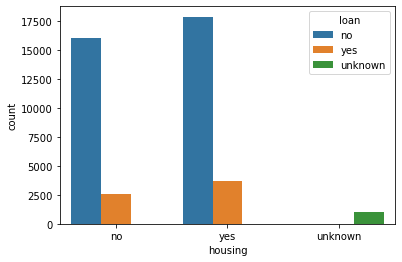

In [12]:
import seaborn as sns
plt.figure()
sns.countplot(x="age", hue="education", data=df[df['age']<20])
plt.figure(figsize=(18, 6))
sns.countplot(x="age", hue="education", data=df[(df['job']=='student')&(df['education']=='unknown')])
plt.figure(figsize=(18, 6))
sns.countplot(x="job", hue="education", data=df[(df['job']!='student')&(df['education']=='unknown')])
plt.figure(figsize=(18, 6))
sns.countplot(x="job", hue="education", data=df[(df['job']=='blue-collar')])
plt.figure(figsize=(18, 6))
sns.countplot(x="job", hue="education", data=df[(df['job']=='unknown')])
plt.figure(figsize=(18, 6))
sns.countplot(x="job", hue="education", data=df[(df['job']=='unemployed')])
plt.figure()
sns.countplot(x="age", hue="housing", data=df[df['age']<20])
plt.figure()
sns.countplot(x="default", hue="loan", data=df)
plt.figure()
sns.countplot(x="housing", hue="loan", data=df)

___
## Data Preprocessing

determine the mode of education for group of 'age'<20

In [13]:
summary_job_edu=df[(df['education']!='unknown')&(df['job']!='student')&(df['job']!='unknown')].groupby(['job'])['education'].agg(lambda x:x.value_counts().index[0]).reset_index()
summary_job_edu 

,job,education
0,admin.,university.degree
1,blue-collar,basic.9y
2,entrepreneur,university.degree
3,housemaid,basic.4y
4,management,university.degree
5,retired,basic.4y
6,self-employed,university.degree
7,services,high.school
8,technician,professional.course
9,unemployed,university.degree


In [14]:
print(df[(df['education']!='unknown')&(df['age']<20)].groupby(['age'])['education'].agg(lambda x:x.value_counts().index[0]).reset_index())

   age    education
0   17     basic.9y
1   18  high.school
2   19     basic.9y


Most of the instances with 17 and 19 years old have education background up to basic.9y, with 18 years old have high.school education background.
so we will replace the "unknown" education for the instances of 17,18 and 19 years old based on their respective mode.

In [15]:
df.loc[(df['age']==17) &(df['education']=='unknown'),'education' ]='basic.9y'
df.loc[(df['age']==18) &(df['education']=='unknown'),'education' ]='high.school'
df.loc[(df['age']==19) &(df['education']=='unknown'),'education' ]='basic.9y'

print(df.loc[(df['age']==19) &(df['education']=='unknown'),'education' ])
print(df["education"].value_counts())

for i in summary_job_edu['job'].unique():
    # print(df.loc[(df['job']==i) &(df['education']=='unknown'),'education'])
    df.loc[(df['job']==i) &(df['education']=='unknown'),'education'] =str(summary_job_edu[(summary_job_edu['job']==i)]['education'].values[0])

Series([], Name: education, dtype: object)
university.degree      12168
high.school             9528
basic.9y                6064
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1699
illiterate                18
Name: education, dtype: int64


In [16]:
df["education"].value_counts()

university.degree      12645
high.school             9678
basic.9y                6518
professional.course     5455
basic.4y                4316
basic.6y                2292
unknown                  266
illiterate                18
Name: education, dtype: int64

<Figure size 1296x432 with 0 Axes>

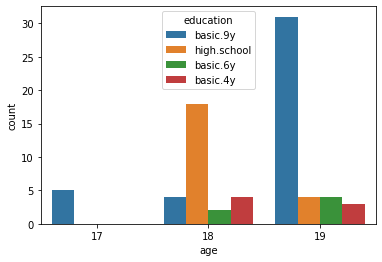

<Figure size 1296x432 with 0 Axes>

In [17]:
import seaborn as sns
plt.figure()
sns.countplot(x="age", hue="education", data=df[df['age']<20])
plt.figure(figsize=(18, 6))

No more unknown data in 'education ' for 'age <20'

In [18]:
get_unique_list(df[(df['age']>80)])

job
['retired' 'housemaid' 'unknown']
retired      88.235294
housemaid    10.084034
unknown       1.680672
Name: job, dtype: float64
marital
['divorced' 'married' 'single']
married     50.420168
divorced    46.218487
single       3.361345
Name: marital, dtype: float64
education
['basic.4y' 'basic.6y' 'professional.course' 'high.school' 'basic.9y'
 'university.degree' 'unknown']
basic.4y               70.588235
university.degree       9.243697
professional.course     5.882353
high.school             5.882353
basic.9y                5.042017
unknown                 1.680672
basic.6y                1.680672
Name: education, dtype: float64
default
['no' 'unknown']
no         79.831933
unknown    20.168067
Name: default, dtype: float64
housing
['yes' 'no' 'unknown']
yes        60.504202
no         37.815126
unknown     1.680672
Name: housing, dtype: float64
loan
['no' 'yes' 'unknown']
no         83.193277
yes        15.126050
unknown     1.680672
Name: loan, dtype: float64
contact
['cellula

<Figure size 1296x432 with 0 Axes>

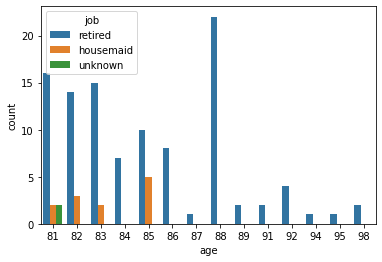

<Figure size 1296x432 with 0 Axes>

In [19]:
import seaborn as sns
plt.figure()
sns.countplot(x="age", hue="job", data=df[df['age']>80])
plt.figure(figsize=(18, 6))


Observed 'age' = 81 has unknown data in job catergory. Based on the chart, most of them are retired, so we would like to fill the unknown data by 'retired'.

In [20]:
df.loc[(df['age']>80) &(df['education']=='unknown'),'education' ]='basic.4y'
df.loc[(df['age']>80) &(df['job']=='unknown'),'job' ]='retired'

<Figure size 1296x432 with 0 Axes>

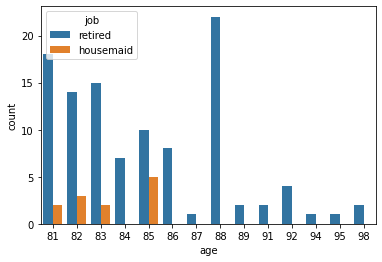

<Figure size 1296x432 with 0 Axes>

In [21]:
import seaborn as sns
plt.figure()
sns.countplot(x="age", hue="job", data=df[df['age']>80])
plt.figure(figsize=(18, 6))

No more unknown data in 'job ' for 'age >80'

Substitute for unknown job based on education

In [22]:
summary_edu_job=df.groupby(['education']).job.agg(lambda x:x.value_counts().index[0]).reset_index()
summary_edu_job

,education,job
0,basic.4y,blue-collar
1,basic.6y,blue-collar
2,basic.9y,blue-collar
3,high.school,admin.
4,illiterate,blue-collar
5,professional.course,technician
6,university.degree,admin.
7,unknown,student


In [23]:
for i in summary_edu_job['education'].unique():
    df.loc[(df['education']==i) &(df['job']=='unknown'),'job' ]=summary_edu_job[(summary_edu_job['education']==i)]['job'].values[0]

In [24]:
get_unique_list(df)

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
admin.           25.502574
blue-collar      22.722638
technician       16.400408
services          9.636302
management        7.099155
retired           4.180829
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.437603
Name: job, dtype: float64
marital
['married' 'single' 'divorced' 'unknown']
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'unknown' 'illiterate']
university.degree      30.700690
high.school            23.497135
basic.9y               15.824998
professional.course    13.244149
basic.4y               10.483636
basic.6y                5.564728
unknown                 0.640963
illiterate

Drop housing,marital and education which contains unknown. 

In [25]:
df.drop(df[(df['housing']=='unknown')|(df['marital']=='unknown')|
                          (df['education']=='unknown')].index,axis=0).y.value_counts()

0    35397
1     4467
Name: y, dtype: int64

In [26]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

We drop 1324 unknown data from housing, marial and education

In [27]:
df=df.drop(df[(df['housing']=='unknown')|(df['marital']=='unknown')|
                          (df['education']=='unknown')].index,axis=0)
df.shape

(39864, 21)

### Determine duplicated data

In [28]:
df.groupby(['age','job','marital','education','default','housing',
           'loan','contact','month','day_of_week'])['y'].count().reset_index()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,17,student,single,basic.9y,no,no,yes,cellular,oct,tue,1
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,2
2,17,student,single,basic.9y,no,yes,no,cellular,aug,wed,1
3,18,student,single,basic.4y,no,no,no,cellular,apr,thu,1
4,18,student,single,basic.4y,no,yes,no,cellular,jun,tue,1
...,...,...,...,...,...,...,...,...,...,...,...
31581,92,retired,married,basic.4y,no,no,yes,cellular,aug,wed,1
31582,92,retired,married,basic.4y,no,yes,no,cellular,may,thu,1
31583,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,1
31584,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,1


Noticed some duplicated data and would like to find out all duplicated data

In [29]:
duplicateRowsDF = df[df.duplicated(keep= False)]
duplicateRowsDF

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,basic.4y,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
12261,36,retired,married,basic.4y,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


In [30]:
df=df.drop_duplicates( keep= False)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [31]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000,39840.000000
mean,40.034664,258.532856,2.566918,963.007304,0.171009,0.085931,93.574598,-40.518614,3.626367,5167.367513,0.112073
std,10.399098,259.635259,2.763999,185.601937,0.490322,1.567813,0.577285,4.622913,1.731227,71.954372,0.315461
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Visualisation of Processed Data

<AxesSubplot:xlabel='y', ylabel='pdays'>

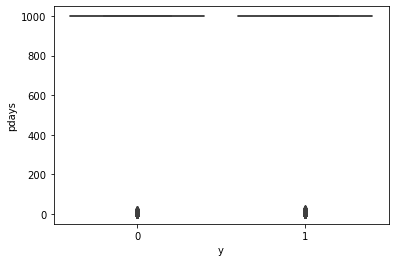

In [32]:
sns.boxplot(x='y', y='pdays', data=df)

pdays is Number of days passed after the last contact with the customer on the previous campaign. 999 pdays means customer that never contacted for previous campaign. 

Text(0.5, 1.0, 'duration boxplot')

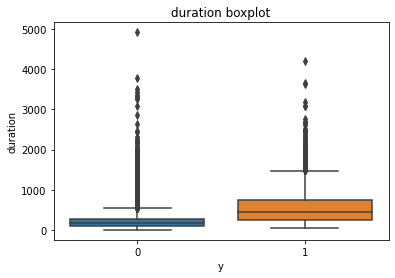

In [33]:
sns.boxplot(x='y', y='duration', data=df).set_title('duration boxplot')

Text(0.5, 1.0, 'age boxplot')

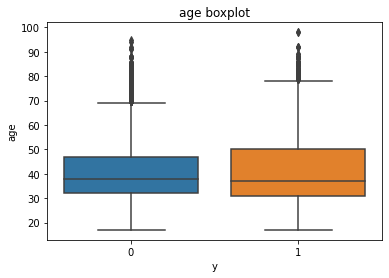

In [34]:
sns.boxplot(x='y', y='age', data=df).set_title('age boxplot')

Text(0.5, 1.0, 'previous boxplot')

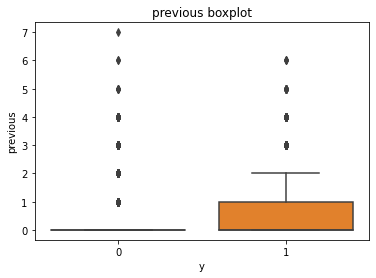

In [35]:
sns.boxplot(x='y', y='previous', data=df).set_title('previous boxplot')

Text(0.5, 1.0, 'campaign boxplot')

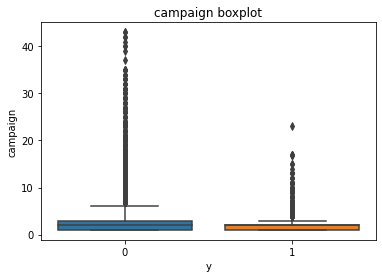

In [36]:
sns.boxplot(x='y', y='campaign', data=df).set_title('campaign boxplot')

Text(0.5, 1.0, 'nr.employed boxplot')

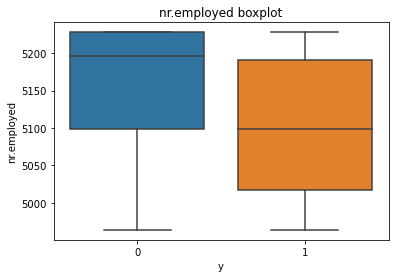

In [37]:
sns.boxplot(x='y', y='nr.employed', data=df).set_title('nr.employed boxplot')

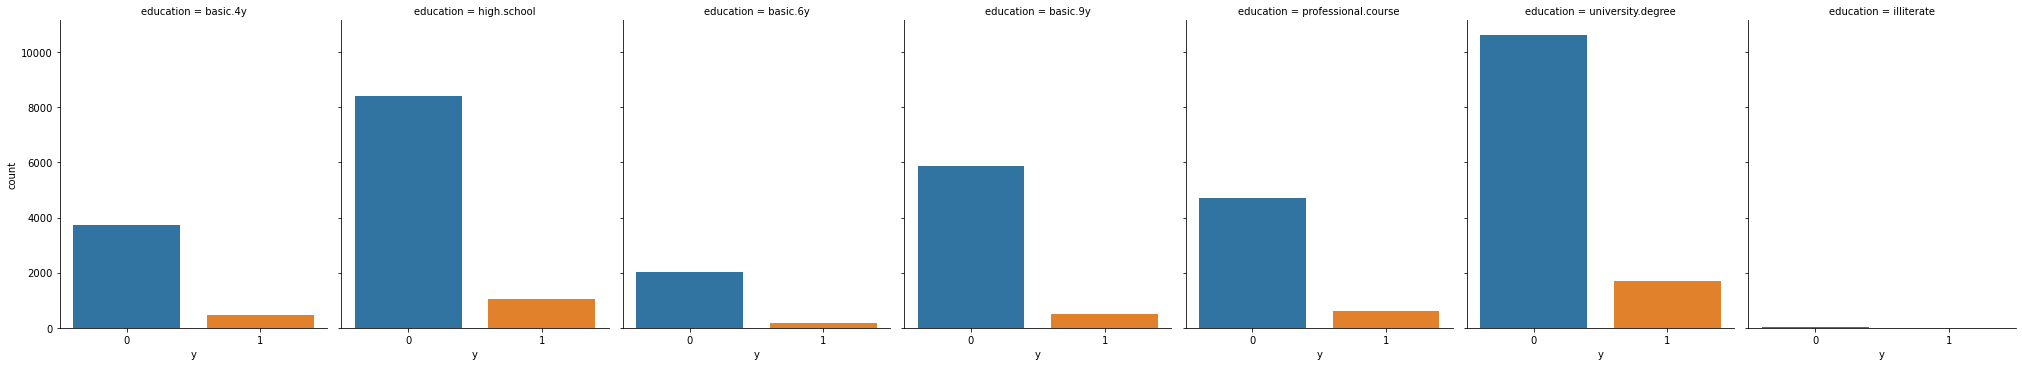

In [38]:
sns.catplot(x='y', col='education', kind='count', data=df,aspect=.8)

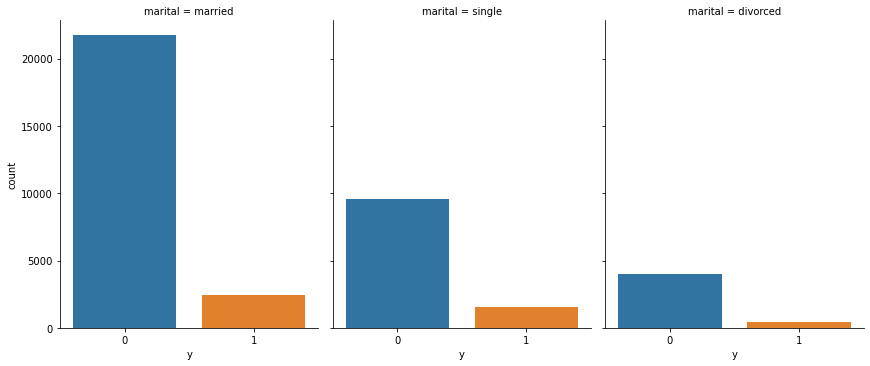

In [39]:
sns.catplot(x='y', col='marital', kind='count', data=df,aspect=.8)

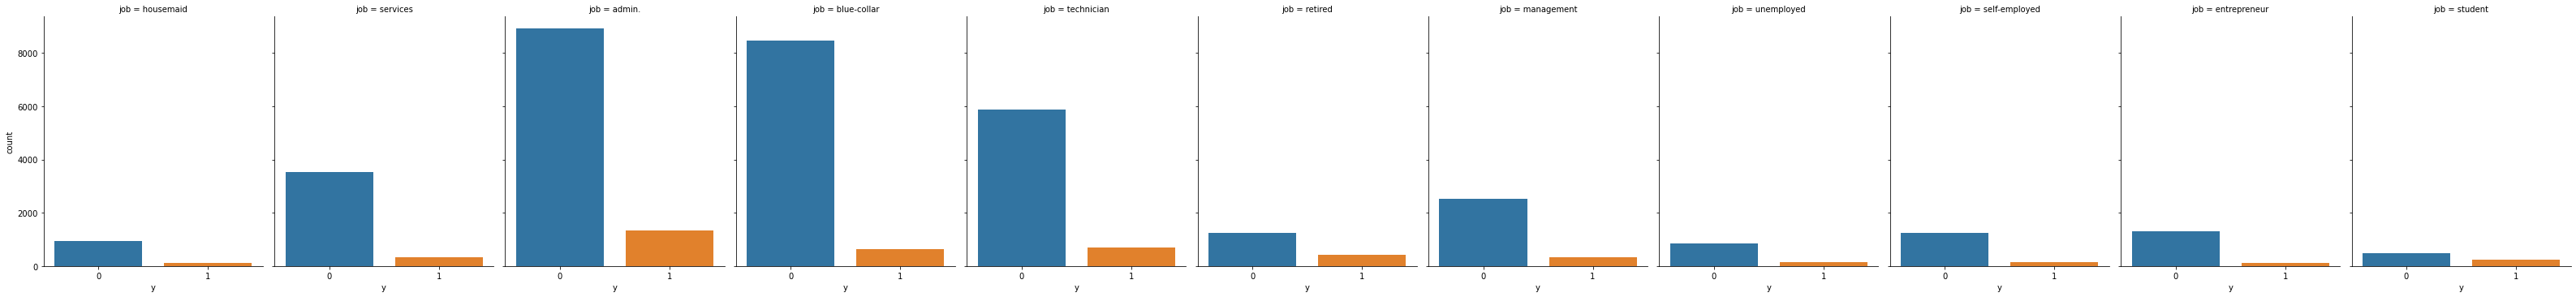

In [40]:
sns.catplot(x='y', col='job', kind='count', data=df,aspect=.8)

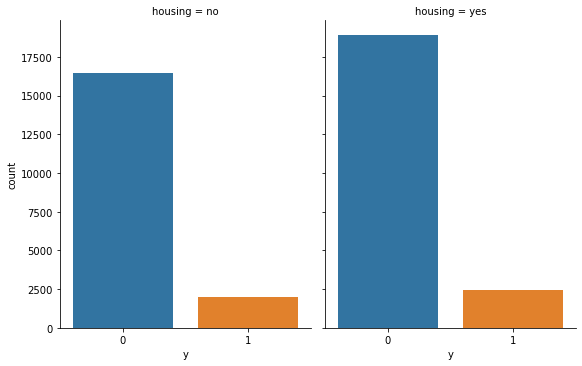

In [41]:
sns.catplot(x='y', col='housing', kind='count', data=df,aspect=.8)

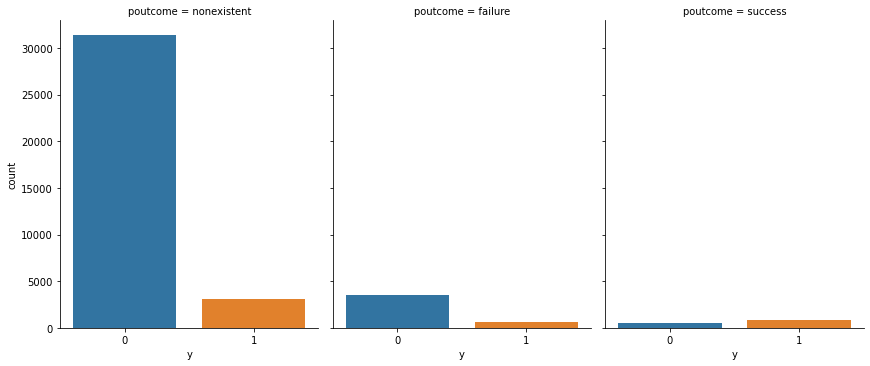

In [42]:
sns.catplot(x='y', col='poutcome', kind='count', data=df,aspect=.8)

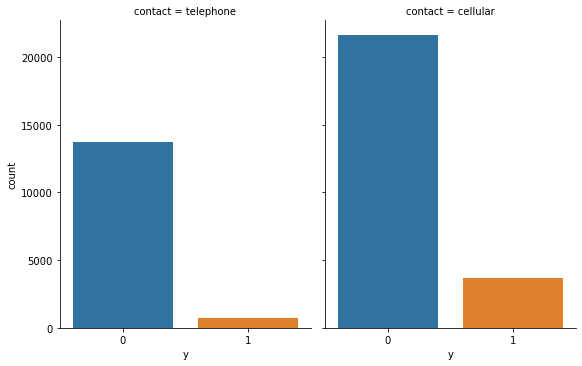

In [43]:
sns.catplot(x='y', col='contact', kind='count', data=df,aspect=.8)

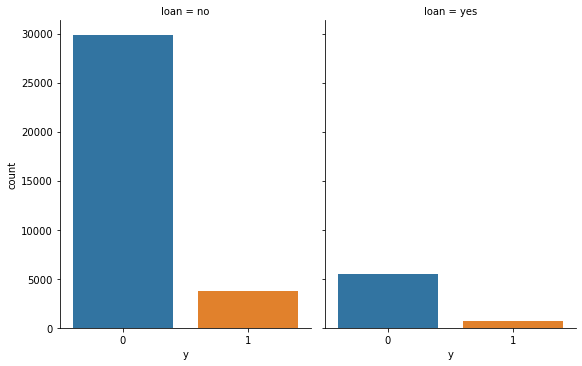

In [44]:
sns.catplot(x='y', col='loan', kind='count', data=df,aspect=.8)

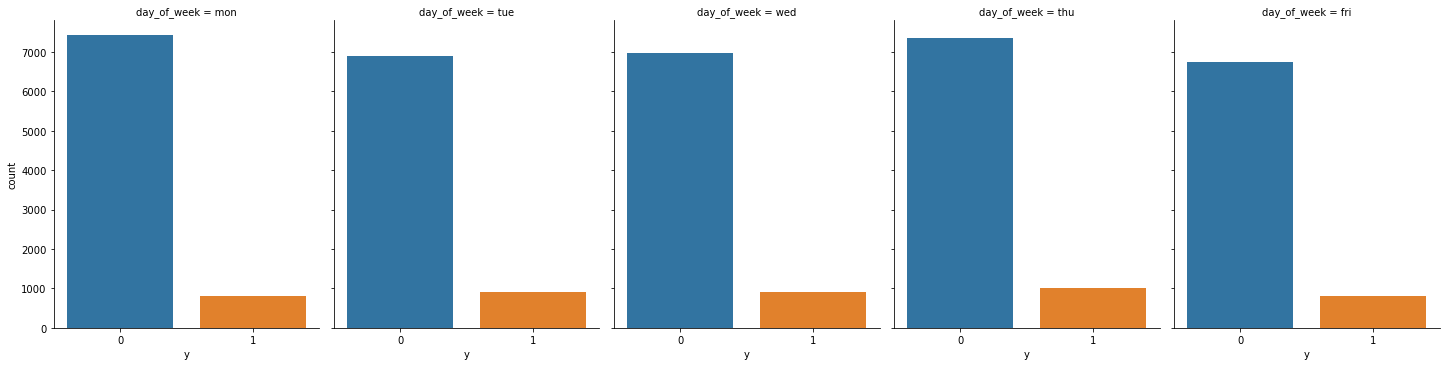

In [45]:
sns.catplot(x='y', col='day_of_week', kind='count', data=df,aspect=.8)

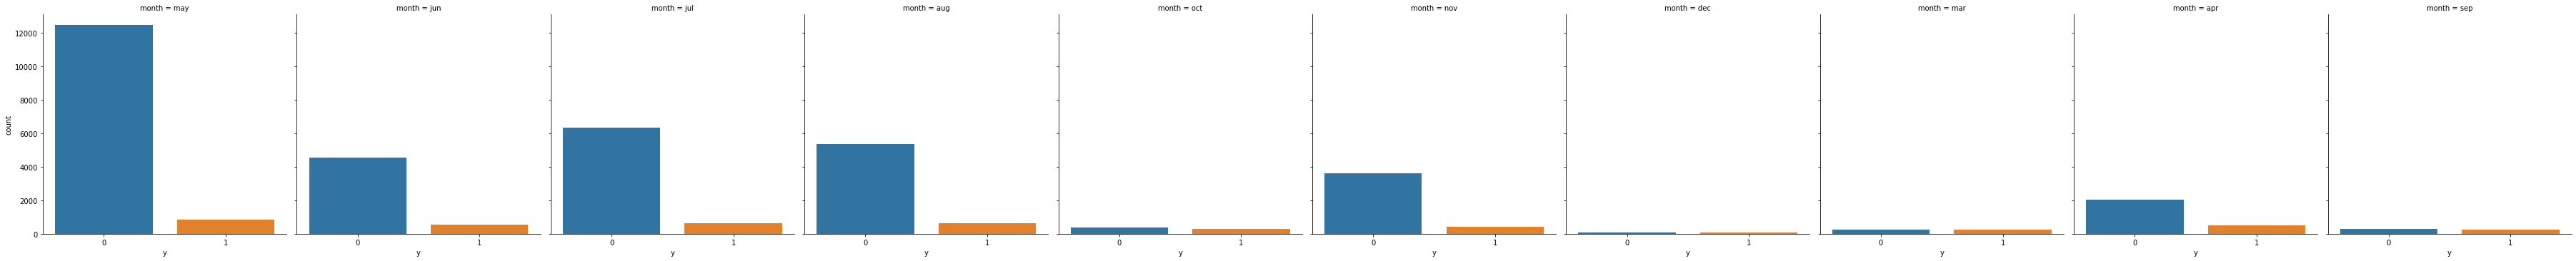

In [46]:
sns.catplot(x='y', col='month', kind='count', data=df)

Text(0.5, 1.0, 'euribor3month rate boxplot')

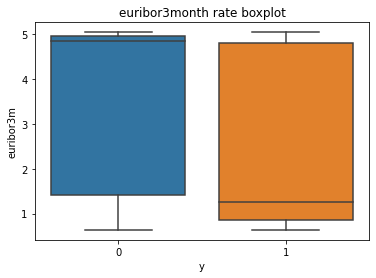

In [47]:
sns.boxplot(x='y', y='euribor3m', data=df).set_title('euribor3month rate boxplot')

Text(0.5, 1.0, 'consumer confidence boxplot')

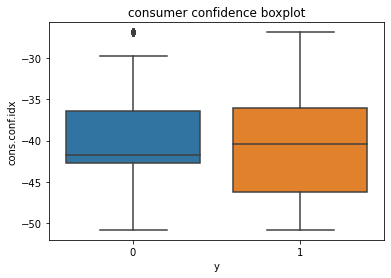

In [48]:
sns.boxplot(x='y', y='cons.conf.idx', data=df).set_title('consumer confidence boxplot')

Text(0.5, 1.0, 'empoloyee variation rate')

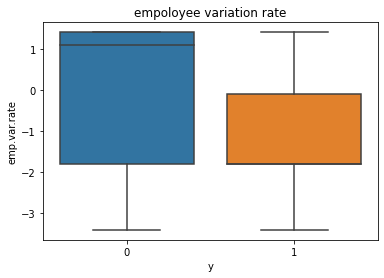

In [49]:
sns.boxplot(x='y', y='emp.var.rate', data=df).set_title('empoloyee variation rate')

### Correlation Study

(11.5, -0.5)

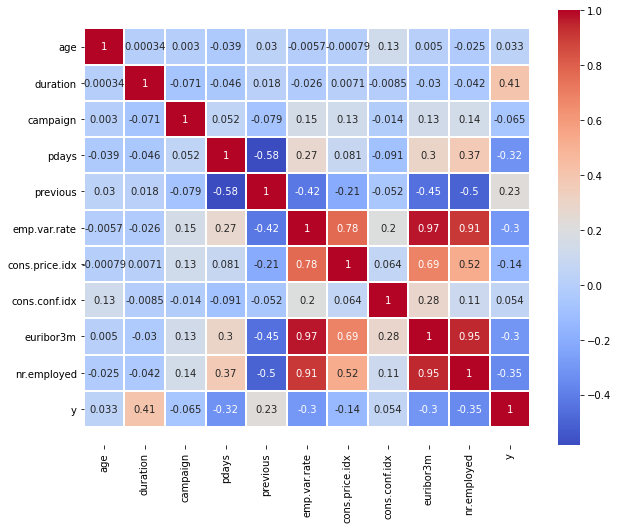

In [50]:
import seaborn as sns

#correlation using heat map plot
plt.figure(figsize=(10,8))
#cmap option: summer/coolwarm
#annot=True means show value on each cell.if dont want, then select None
ax = sns.heatmap(df.corr(),annot=True ,cmap='coolwarm',cbar=True, linewidths=1 )
bottom, top= ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

from the heatmap correlation analysis, the most useful attribute is "duration"(0.41), followed by "nr.employed"(-0.35), "pdays"(-0.32) and "euribor3m"(-0.31).

In [51]:
# df.head()
df.shape

(39840, 21)

### Encode binary data

In [52]:
# change columns with yes/no to 1 for "yes" and 0 for "no"
cols_yn = ["default", "housing", "loan"]

for col in cols_yn: 
    df[col] = df[col].apply(lambda x: 1 if x=="yes" else 0)

In [53]:
# df.dtypes

### One hot encode on categorical data

In [54]:
# perform one hot encode on categorical data using pandas.DataFrame.get_dummies()
old_df = df

cols=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[cols])],axis=1)
df=df.drop(cols, axis=1)
# df.info()
# df.head()

In [55]:
# re-order the columns such that column y is the last column
cols = [x for x in df.columns if x!= "y"]
cols.append("y")
df = df[cols]
# df.head()

### Train-test split

In [56]:
# split feature with label

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [57]:
# split data to test and train set

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# # Check the data
# print("=============== x_train ===============")
# print(x_train)
# print("=============== x_test ===============")
# print(x_test)
# print("=============== y_train ===============")
# print(y_train)
# print("=============== y_test ===============")
# print(y_test)

In [58]:
## Save file to CSV
# old_df.to_csv("cleaned_data.csv", index=False)
# df.to_csv("cleaned_data_encoded.csv", index=False)

___
## Parameter Tuning and Modelling

### Decision Tree

#### Study how each individual parameter configuration will affect the performance

In [59]:
# Parameter Tuning and Modelling
# Decision Tree
# Study how each individual parameter configuration will affect the performance

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.metrics import classification_report
from pprint import pprint

#parameters to evaluate
params = {"criterion": ["gini", "entropy"],
          "max_depth": [5, 10, 15, None],
          "min_samples_leaf": [1, 10, 20, 30]}

#evaluate criterion
criteria = params["criterion"]
criteria_report = {}


for criterion in criteria: 
    dtree = DecisionTreeClassifier(criterion=criterion).fit(x_train, y_train)
    predict = dtree.predict(x_test)
    report = classification_report(y_test, predict, digits=6, output_dict=True)
    criteria_report[criterion] = report["1"]
    criteria_report[criterion]["accuracy"] = report["accuracy"]

#print("\ncriterion")
#pprint(criteria_report)
    
#evaluate max_depth
depths = params["max_depth"]
depths_report = {}

for depth in depths: 
    dtree = DecisionTreeClassifier(max_depth=depth).fit(x_train, y_train)
    predict = dtree.predict(x_test)
    report = classification_report(y_test, predict, digits=6, output_dict=True)
    depths_report[depth] = report["1"]
    depths_report[depth]["accuracy"] = report["accuracy"]

#print("\nmax_depth")
#pprint(depths_report)

#evaluate min_samples_leaf
leaves = params["min_samples_leaf"]
leaves_report = {}

for leaf in leaves: 
    dtree = DecisionTreeClassifier(min_samples_leaf=leaf).fit(x_train, y_train)
    predict = dtree.predict(x_test)
    report = classification_report(y_test, predict, digits=6, output_dict=True)
    leaves_report[leaf] = report["1"]
    leaves_report[leaf]["accuracy"] = report["accuracy"]

#print("\nmin_samples_leaf")
#pprint(leaves_report)

depths_report["None"] = depths_report[None]
del depths_report[None]

reports = {"criterion": criteria_report, 
           "max_depth": depths_report, 
           "min_samples_leaf": leaves_report}

report_df = pd.DataFrame.from_dict({(i,j): reports[i][j] 
                                   for i in reports.keys() 
                                   for j in reports[i].keys()},
                                   orient='index')

report_df = report_df.reset_index()
report_df.columns = ["parameter", "value", "precision", "recall", "f1-score", "support", "accuracy"]

In [60]:
# report_df.to_csv("report.csv")
report_df

,parameter,value,precision,recall,f1-score,support,accuracy
0,criterion,gini,0.501769,0.529500,0.515262,1339,0.888387
1,criterion,entropy,0.499647,0.528753,0.513788,1339,0.887885
2,max_depth,5,0.637343,0.530246,0.578883,1339,0.913571
3,max_depth,10,0.591803,0.539208,0.564283,1339,0.906710
4,max_depth,15,0.520432,0.504108,0.512140,1339,0.892403
5,max_depth,None,0.497512,0.522778,0.509832,1339,0.887383
6,min_samples_leaf,1,0.500701,0.533234,0.516456,1339,0.888136
7,min_samples_leaf,10,0.594153,0.516057,0.552358,1339,0.906292
8,min_samples_leaf,20,0.602254,0.558626,0.579620,1339,0.909220
9,min_samples_leaf,30,0.607955,0.559373,0.582653,1339,0.910224


For splitting criterion, entropy method was found to provide a better F1-score. Accuracy of the decision tree model was found to increase with the use of entropy criterion as compared to gini-index. 

As for the depth of tree, it was found that the F1-score of the decision tree models reduces as the number of depths is allowed to increase. However, the accuracy of the model reduces with the increase in number of depth. Higher F1-score is preferred as it indicates that we model is able to predict the true minority class of “yes” more accurately. 

F1-score and accuracy of model was found to increase when minimum number of samples required to be at a leaf node.


#### Use GridSearchCV to find the best configuration

In [61]:
from sklearn.model_selection import GridSearchCV


d_tree = DecisionTreeClassifier(random_state=0)

params = {"criterion": ["gini", "entropy"],
          "max_depth": [5, 10, 15, None],
          "min_samples_leaf": [1, 10, 20, 30]}

d_tree_grid = GridSearchCV(d_tree, param_grid=params, scoring="f1" , n_jobs=-1, cv=10, verbose=4, refit=True)
# train classifier
d_tree_grid.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 10, 20, 30]},
             scoring='f1', verbose=4)

In [62]:
# results from parameter tuning
results = pd.DataFrame(d_tree_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.188967,0.009302,0.007916,0.003562,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.552102,0.590747,...,0.606557,0.605657,0.554080,0.554348,0.593640,0.569853,0.528090,0.576883,0.027592,12
1,0.187102,0.008949,0.009118,0.002439,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.552102,0.590747,...,0.606557,0.605657,0.556190,0.554348,0.593640,0.565619,0.523364,0.576577,0.028940,13
2,0.179697,0.004429,0.008517,0.003235,gini,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.551351,0.601054,...,0.604269,0.603648,0.552381,0.558140,0.593250,0.573503,0.518797,0.577015,0.029440,11
3,0.190107,0.007440,0.008508,0.002357,gini,5,30,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.550725,0.601054,...,0.596667,0.602649,0.557875,0.554955,0.592199,0.573503,0.524345,0.576130,0.026634,14
4,0.318428,0.023904,0.010939,0.002584,gini,10,1,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.530405,0.592965,...,0.581059,0.557143,0.595469,0.559068,0.573311,0.565068,0.564460,0.573885,0.023572,18
5,0.344397,0.036189,0.009761,0.000860,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.529307,0.589041,...,0.585925,0.570916,0.580645,0.539683,0.582492,0.534965,0.576512,0.569084,0.023887,20
6,0.312434,0.016265,0.011949,0.006188,gini,10,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.536503,0.608403,...,0.591362,0.576923,0.594417,0.548951,0.574830,0.578483,0.560714,0.577972,0.022843,9
7,0.298335,0.010338,0.009935,0.000620,gini,10,30,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.542373,0.621160,...,0.568458,0.589878,0.584041,0.567521,0.569948,0.591150,0.581818,0.579688,0.019341,6
8,0.409607,0.007878,0.009922,0.000614,gini,15,1,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.504092,0.560000,...,0.500792,0.548495,0.524960,0.504146,0.532680,0.543947,0.555556,0.532861,0.021924,29
9,0.372267,0.013484,0.009920,0.000610,gini,15,10,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.550523,0.583893,...,0.565217,0.574871,0.561102,0.522523,0.521589,0.514286,0.541593,0.551051,0.023749,25


In [63]:
print("Best combination of parameter: ", d_tree_grid.best_params_)
print("F1-score: ", d_tree_grid.best_score_)

Best combination of parameter:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
F1-score:  0.5889947108788984


Parameter combination of {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20} provides the best F1-score of 0.5889947108788984

#### Testing the model configured with the best parameter using the test dataset

              precision    recall  f1-score   support

           0   0.948231  0.954396  0.951303     10613
           1   0.618898  0.587005  0.602530      1339

    accuracy                       0.913236     11952
   macro avg   0.783564  0.770700  0.776916     11952
weighted avg   0.911335  0.913236  0.912230     11952

The prediction accuracy is: 91.32%


Text(0.5, 17.5, 'Predicted label')

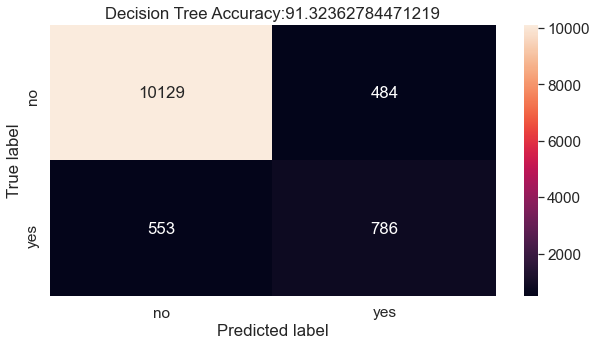

In [64]:
predict = d_tree_grid.predict(x_test)

print (classification_report(y_test, predict, digits=6))
print("The prediction accuracy is: {0:2.2f}{1:s}".format((y_test == predict).sum()/x_test.shape[0]*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['no','yes'], 
                     columns = ['no','yes'])

# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
plt.title("Decision Tree Accuracy:" + str((y_test == predict).sum()/x_test.shape[0]*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Naive Bayes

#### Find the best combination of parameters

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters :  {'alpha': 1, 'binarize': 2}
Number of mislabeled points out of a total 11952 points : 1325, performance 88.91%
              precision    recall  f1-score   support

           0   0.891965  0.995760  0.941009     10613
           1   0.567308  0.044063  0.081774      1339

    accuracy                       0.889140     11952
   macro avg   0.729636  0.519911  0.511391     11952
weighted avg   0.855593  0.889140  0.844748     11952



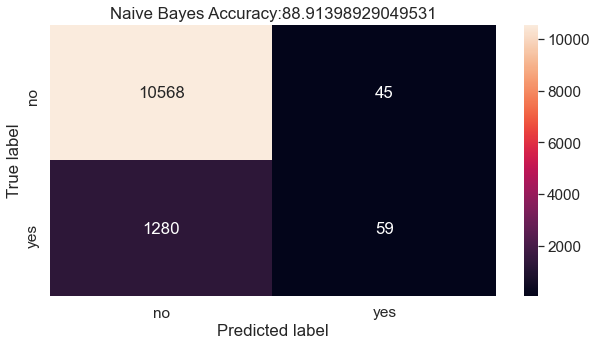

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

# Instantiate the classifier
bnb = BernoulliNB()

params = {'alpha': [1, 5, 10], 
          'binarize': [0, 1, 2]}
    
bnb_grid = GridSearchCV(bnb, param_grid=params, n_jobs=-1, cv=10, verbose=1, scoring="accuracy" )
# Train classifier
bnb_grid.fit(x_train,y_train)

# Test the classifier
predict = bnb_grid.predict(x_test)

#print('Train Accuracy : %.3f'%bnb_grid.best_estimator_.score(x_train, y_train))
#print('Test Accuracy : %.3f'%bnb_grid.best_estimator_.score(x_test, y_test))
#print('Best Accuracy Through Grid Search : %.3f'%bnb_grid.best_score_)
print('Best Parameters : ',bnb_grid.best_params_)
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              (y_test == predict).sum()/x_test.shape[0]*100))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['no','yes'], 
                     columns = ['no','yes'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str((y_test == predict).sum()/x_test.shape[0]*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')


print(classification_report(y_test, predict, digits=6))

In [69]:
# results from parameter tuning
results = pd.DataFrame(bnb_grid.cv_results_)
results.to_csv("fml.csv")
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_binarize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.098089,0.008631,0.009888,0.001232,1,0,"{'alpha': 1, 'binarize': 0}",0.822876,0.846181,0.829688,0.839728,0.826820,0.837218,0.835783,0.833274,0.851865,0.836801,0.836023,0.008217,9
1,0.089336,0.008327,0.009670,0.003783,1,1,"{'alpha': 1, 'binarize': 1}",0.869846,0.880602,0.879168,0.877375,0.879168,0.884546,0.877734,0.877017,0.881277,0.869440,0.877617,0.004504,5
2,0.094652,0.008670,0.011666,0.003648,1,2,"{'alpha': 1, 'binarize': 2}",0.888132,0.889566,0.889208,0.890283,0.889208,0.890642,0.888490,0.889566,0.889885,0.890961,0.889594,0.000848,1
3,0.144497,0.025913,0.019408,0.011226,5,0,"{'alpha': 5, 'binarize': 0}",0.823234,0.845823,0.830047,0.840445,0.827537,0.837576,0.836142,0.833274,0.851148,0.837518,0.836274,0.007920,8
4,0.124996,0.025488,0.012414,0.004080,5,1,"{'alpha': 5, 'binarize': 1}",0.869846,0.880602,0.879168,0.877375,0.879168,0.884546,0.877734,0.877017,0.881277,0.869440,0.877617,0.004504,5
5,0.097419,0.011680,0.012890,0.005196,5,2,"{'alpha': 5, 'binarize': 2}",0.887773,0.889208,0.889208,0.890283,0.889208,0.890642,0.888490,0.889566,0.889885,0.890603,0.889487,0.000868,2
6,0.103610,0.010312,0.012448,0.004123,10,0,"{'alpha': 10, 'binarize': 0}",0.824310,0.845106,0.831122,0.840086,0.828971,0.838652,0.835425,0.833991,0.851865,0.837877,0.836740,0.007554,7
7,0.103477,0.020824,0.012006,0.006929,10,1,"{'alpha': 10, 'binarize': 1}",0.869846,0.881319,0.879168,0.880244,0.880961,0.885981,0.878810,0.877734,0.883788,0.871234,0.878908,0.004776,4
8,0.118587,0.023985,0.010829,0.004724,10,2,"{'alpha': 10, 'binarize': 2}",0.887773,0.889208,0.889208,0.890283,0.889208,0.890642,0.888490,0.889566,0.889885,0.890603,0.889487,0.000868,2
